Onda cuadrada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  

def square_wave(x):
    return np.where((x % (2 * np.pi)) < np.pi, 1, -1)

def fourier_series_approx(x, N):
    approximation = np.zeros_like(x)
    for k in range(1, N+1):
        approximation += (4 / (np.pi * (2*k - 1))) * np.sin((2*k - 1) * x)
    return approximation

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

filenames = []

for N in [1, 3, 10, 30, 100]:
    plt.figure(figsize=(10, 6))
    plt.plot(x, square_wave(x), label='Onda cuadrada', color='black', linewidth=2)

    plt.plot(x, fourier_series_approx(x, N), label=f'N = {N}')

    plt.title(f'Serie de Fourier para una onda cuadrada (N = {N})')
    plt.xlabel('x')
    plt.ylabel('')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid(True)

    filename = f'frame_{N}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

with imageio.get_writer('fourier_series_approx.gif', mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

import os
for filename in filenames:
    os.remove(filename)

Mounstro de Weierstrass $\sum a^n  cos(b^n \pi x)$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio  # Use imageio.v2 for newer versions
import os

def weierstrass_function(x, a, b, N):
    return sum(a**n * np.cos(float(b)**n * np.pi * x) for n in range(min(N, 100)))

a = 0.5
b = 3
N_values = [1, 3, 10, 30]

x = np.linspace(-2, 2, 10000)
filenames = []

# Create and save plots for each N value
for N in N_values:
    plt.figure(figsize=(10, 6))
    plt.plot(x, weierstrass_function(x, a, b, N), label=f'N = {N}', color='black', linewidth=0.7)
    plt.title(f'Mounstro de Weierstrass $\sum a^n \cos(b^n \pi x)$ (N = {N})')
    plt.xlabel('x')
    plt.ylabel('W(x)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid(True)
    
    filename = f'weierstrass_{N}.png'
    plt.savefig(filename, dpi=300)
    filenames.append(filename)
    plt.close()

# Create GIF
with imageio.get_writer('weierstrass_function.gif', mode='I', duration=2000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up image files
for filename in filenames:
    os.remove(filename)


ModuleNotFoundError: No module named 'imageio'

Funcion de Bessel de orden zero $J_0(\xi r)$

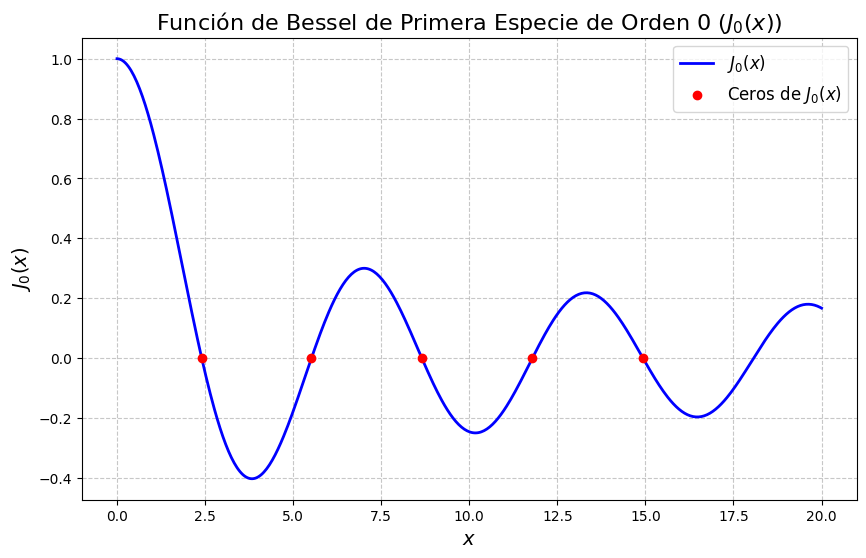

In [6]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Función de Bessel de primera especie (J_n(x))

# 1. Definir el rango de valores x
x = np.linspace(0, 20, 500)  # Crear 500 puntos entre 0 y 20

# 2. Calcular la función de Bessel de primera especie de orden 0 (J_0(x))
J0 = jv(0, x)  # jv(orden, valores) calcula J_n(x)

# 3. Configurar la figura para la gráfica
plt.figure(figsize=(10, 6))

# 4. Graficar J_0(x)
plt.plot(x, J0, 
         label=r'$J_0(x)$',  # Etiqueta usando notación LaTeX
         color='blue', 
         linewidth=2)

# 5. Añadir títulos y etiquetas
plt.title(r'Función de Bessel de Primera Especie de Orden 0 ($J_0(x)$)', 
          fontsize=16)
plt.xlabel(r'$x$', fontsize=14)  # Eje x
plt.ylabel(r'$J_0(x)$', fontsize=14)  # Eje y

# 6. Añadir rejilla estilizada
plt.grid(True, linestyle='--', alpha=0.7)

# 7. Marcar los ceros de J_0(x)
# Primeros 5 ceros aproximados de J_0(x)
zeros = np.array([2.4048, 5.5201, 8.6537, 11.7915, 14.9309])  
plt.scatter(zeros, np.zeros_like(zeros),  # Posición (x, 0)
           color='red', 
           zorder=5,  # Prioridad de visualización
           label='Ceros de $J_0(x)$')

# 8. Añadir leyenda
plt.legend(fontsize=12)

# 9. Mostrar la gráfica
plt.show()